# Optimisation algorithms on Quantum Harmonic Oscillator Energy functions
## Konstantinos Doran SN:22007700
### Introduction
In this notebook I will be looking at the energy of a quantum harmonic oscillator (QHO) and finding its minimum eneergy using root finding methods and optimisation functions. First I will approach the oscillator in 1 dimension before expanding to a 2D model. This model has been simplified and uses atomic units, such that $\hbar =  m_e = 1$
The Hamiltonian of the QHO can be written as:
$$
\hat{H} = -\frac{1}{2}\frac{d^2}{dx^2} +\frac{1}{2}\omega^2x^2
$$
Setting $\omega=1$, we get the solution: 
$$
\psi(x) = (2\alpha/\pi)^{1/4}e^{-\alpha x^2}
$$

In [59]:
# Importing matplotlib and numpy
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Section on 1D QHO
In this section I will find the minimum energy of the wavefunction using the bisection root finding technique to find the root of the derivative of the energy, given by the following equation:
$$
E_{GS} = \frac{\alpha}{2} + \frac{1}{8\alpha}
$$
Furthermore, $\alpha$ is defined to be positive thus only the positive coordinates are plotted

In [2]:
def bisection(fun,a,b,tol):
    """
    Takes in function, two seperate points, and tolerance and bisects the points 
    until the root of the function is found, maximum iterations is reached, or tolerance reached.
    Inputs:
    fun  mathematical function that takes one input and returns one output. (function)
    a    first value input into function (float/int)
    b    second value input into function (float/int)
    tol  tolerance value will dictate how precise a root the bisection will output (float)
    Outputs:
    n    iteration counter will give the number of iterations it took to find the root (int)
    c    final value calculated from bisection, not guaranteed to be root (float)
    """
    # Evaluate f(a) and f(b)
    f_a = fun(a)
    f_b = fun(b)
    c = (a + b)/2
    f_c = fun(c)
    # Initialise counter
    n = 0 
    # Set max number of iterations
    maxturns = 200
    # Now an iterative loop
    while (abs(a-b) > tol) and (n < maxturns):
        # Calculate function at points
        f_a = fun(a)
        f_b = fun(b)
        f_c = fun(c)
        # Check if a and c values are same sign
        if f_a*f_c > 0:
            # Move point a to c
            a = c
            f_a = f_c
        else:
            # Move point b to c
            b = c
            f_b = f_c
        # Calculate the new c 
        c = (a + b)/2
        # Iterate counter
        n = n + 1
    # Return iterations and root
    return n, c

In [3]:
def QHO_E(alpha):
    """Energy function takes in value and calculates the energy of 
    a quantum harmonic oscillator for this value.
    Inputs:
    alpha    number 
    Outputs:
    Energy   Energy of QHO 
    """
    Energy = alpha/2 + 1/(8*alpha)
    return Energy # Energy

<ipython-input-35-11e6dd0294eb>:9: RuntimeWarning: divide by zero encountered in true_divide
  grad = 1/2 -1/(8*np.square(alpha))


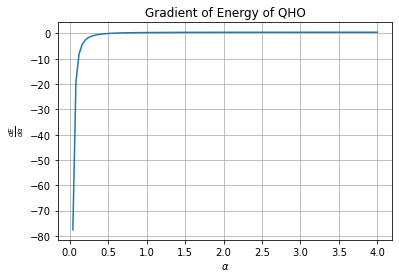

In [35]:
def QHO_grad(alpha):
    """Gradient of the Energy function takes in values for alpha 
    and returns gradient for that value of alpha.
    Inputs:
    alpha number
    Outputs:
    grad  gradient of E for that value of alpha
    """
    grad = 1/2 -1/(8*np.square(alpha))
    return grad # dE/dalpha
# Create array of alpha
alpha = np.linspace(0,4,101)
# Plot these values to identify root
plt.plot(alpha,QHO_grad(alpha))
# Add axis labels and title
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\frac{dE}{d\alpha}$")
plt.title("Gradient of Energy of QHO")
plt.grid()

In [44]:
# Define brackets and tolerance
a = 0.25
b = 0.75
tolerance = 1e-16
# Run bisection
n, alpha = bisection(QHO_grad,a,b,tolerance) 
# Output result
print("There were "+str(n)+" iterations and the minimum energy is at alpha =",alpha)
print("This results in a minimum energy of "+str(QHO_E(alpha)))

There were 53 iterations and the minimum energy is at alpha = 0.5
This results in a minimum energy of 0.5


The bisection root function took 53 iterations to converge to an exact value of 0.5 for the minimum point of the Energy function which is a lot of iterations considering the bracket size was small and would be very slow if calculating the root of a function over a larger domain. This root finding method is inefficient although simple.

### Section on 2D QHO
Now increasing the complexity of the model to 2D, the new wavefunction is:
$$
\psi(x) = (2\alpha/\pi)^{1/4}e^{-\alpha x^2}(2\beta/\pi)^{1/4}e^{-\alpha y^2}
$$
and has energy:
$$
E_{GS} = \frac{\alpha}{2} + \frac{1}{8\alpha} + \frac{\beta}{2} + \frac{1}{8\beta}
$$
Where now we must use partial derivatives to find the minimum of the energy. I will now use the SciPy library to import the optimize.minimize function to calculate the minimum instead as it is more efficient for multi-dimensional optimisation. As both $\alpha$ and $\beta$ are positive I will plot only the positive quadrant for both. 

In [46]:
def QHO_2D_grad(x):
    """Vector gradient function for QHO. Takes 2D array of coordinates 
    as input and returns the vector gradient at the point as a 2D array 
    Inputs:
    x       2D array of coordinates of the form (x,y)
    Outputs:
    vecgrad 2D array of the gradient at input coordinates
    """
    # Remember that x[0] will be alpha and x[1] will be beta
    grada = 0.5 - 1/(8*np.square(x[0]))
    gradb = 0.5 - 1/(8*np.square(x[1]))
    vecgrad = np.array([grada, gradb])
    return vecgrad

In [7]:
def QHO_2D_E(x):
    """Energy function of QHO. Takes 2D array of coordinates as 
    input and returns array of scalars at each point.
    Inputs:
    x       2D array of coordinates of the form (x,y)
    Outputs:
    Energy  2D array of energy value at input coordinates
    """
    Energy = x[0]/2 + 1/(8*x[0]) + x[1]/2 + 1/(8*x[1])
    return Energy

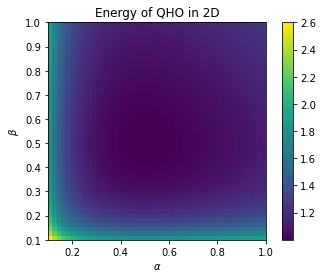

In [38]:
# Create arrays for alpha and beta
alpha = np.linspace(0.1,1,50)
beta = np.linspace(0.1,1,50)
# Convert into mesh grid
alpha2D, beta2D = np.meshgrid(alpha,beta)
grid = np.array([alpha2D,beta2D])
# Plot energy 
plt.imshow(QHO_2D_E(grid),origin="lower", extent=(0.1,1,0.1,1))
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
plt.title("Energy of QHO in 2D")
plt.colorbar()

In [50]:
# Import scipy optimize function
from scipy import optimize
# Arbitrary starting point
x0 = np.array([0.3, 0.4])
opt_result = optimize.minimize(QHO_2D_E , x0, method='CG', jac= QHO_2D_grad) # Fill in appropriate functions for 1st and 4th arguments

In [58]:
# Print resulting minimum, number of iterations using opt_result.x etc
print("Minimum point at:",opt_result.x, "Number of iterations:", opt_result.nit)
# Confirm whether the optimisation was successful
print("The optimisation was successful:"+str(opt_result.success))
print("The minimum energy is:", QHO_2D_E(opt_result.x))

Minimum point at: [0.50000017 0.5       ] Number of iterations: 5
The optimisation was successful:True
The minimum energy is: 1.00000000000003


### Conclusions
Evidently the minimisation algorithm that uses Conjugate gradients was far more efficient. It found the minimum energy within 5 iterations, thus proving as a superior alternative compared to bisection, even in 1D it was slower. Plotting the energy was also very helpful in deciding what point I should start at.